# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In this dataset I think there are some columns which I think is not required to build the model i.e. Loan_ID & Dependents. So, I will remove these columns now.

In [4]:
df=df.drop(['Loan_ID','Dependents'], axis=1)

In [5]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 11)

There are 614 rows & 11 columns available

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In this dataset there are 4 float(64), 1 int(64) and 6 objects available

In [8]:
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values are present in this dataset. I will try to remove these null values

In [9]:
nullcol=['Gender','Married','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [10]:
for i in nullcol:
    df[i]=df[i].fillna(value=(df[i].mode()[0]))

In [11]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
for i in df.columns:
    print(df[i].value_counts(), ('\n'))

Male      502
Female    112
Name: Gender, dtype: int64 

Yes    401
No     213
Name: Married, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     532
Yes     82
Name: Self_Employed, dtype: int64 

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64 

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 

1.0    525
0.0     89
Name: Credit_History, dt

CoapplicantIncome has many 0 values it means data is not availabel. So, I am going to remove these column

In [14]:
df=df.drop('CoapplicantIncome', axis=1)

In [15]:
df.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,145.465798,342.410423,0.855049
std,6109.041673,84.180967,64.428629,0.352339
min,150.000000,9.000000,12.000000,0.000000
25%,2877.500000,100.250000,360.000000,1.000000
50%,3812.500000,125.000000,360.000000,1.000000
75%,5795.000000,164.750000,360.000000,1.000000
max,81000.000000,700.000000,480.000000,1.000000


All data is present in continues coloumns
Mean value & 50% value is not matching in ApplicantIncome LoanAmount  Loan_Amount_term columns
Standard Division and mean also not proper in ApplicantIncome. It means there are outlier present in this dataset


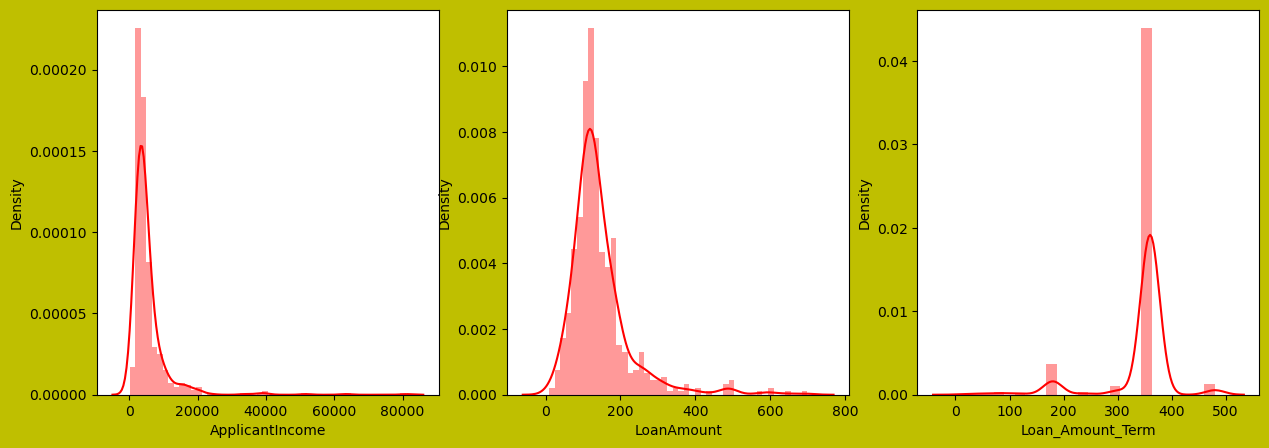

In [16]:
#Checking Outliers by ploting dist plot
con=['ApplicantIncome','LoanAmount','Loan_Amount_Term']

plt.figure(figsize=(15,5), facecolor='y')
plotnumber=1

for i in df[con]:
    if plotnumber<=4:
        ax=plt.subplot(1,3, plotnumber)
        sns.distplot(df[i], color='r')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

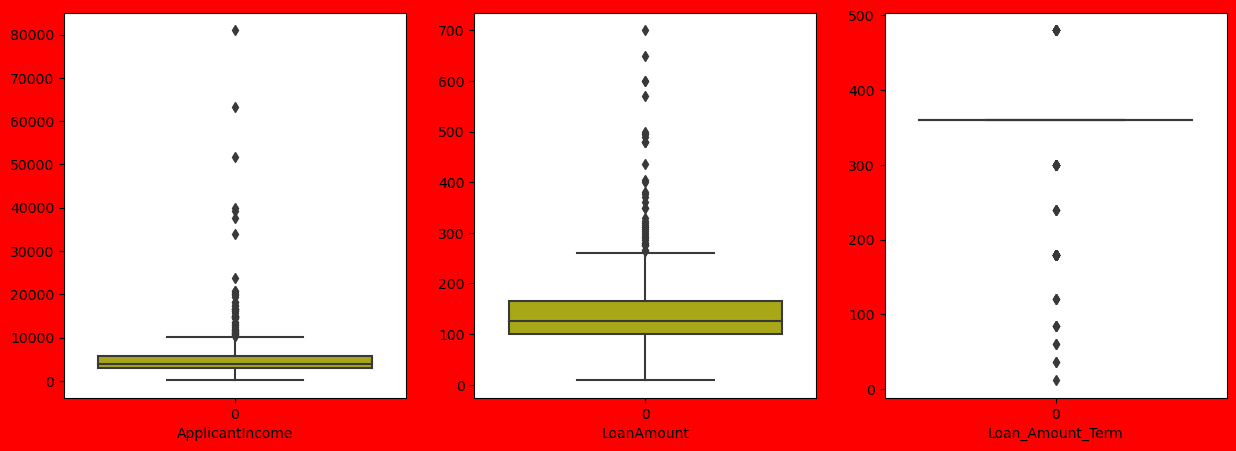

In [17]:
#Now I will try to check the outlier by ploting box plot.
plt.figure(figsize=(15,5), facecolor='r')
plotnumber=1

for i in df[con]:
    if plotnumber<=4:
        ax=plt.subplot(1,3, plotnumber)
        sns.boxplot(df[i], color='y')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [18]:
#Tyr to remove the outlier in above three columns
from scipy.stats import zscore
z_score=zscore(df[['ApplicantIncome','LoanAmount','Loan_Amount_Term']])

In [19]:
abs_z_score=np.abs(z_score)

In [20]:
filter_entry=(abs_z_score<3).all(axis=1)

In [21]:
df=df[filter_entry]

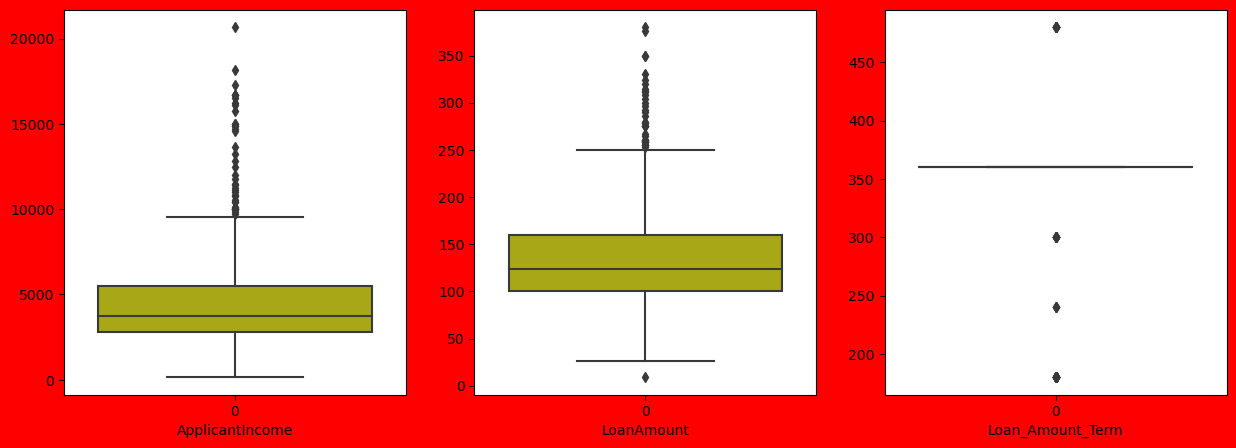

In [26]:
#After applying zscore again checking the outlier by ploting box plot.
plt.figure(figsize=(15,5), facecolor='r')
plotnumber=1

for i in df[con]:
    if plotnumber<=4:
        ax=plt.subplot(1,3, plotnumber)
        sns.boxplot(df[i], color='y')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

I am able to remove many outliers by appling zscore

In [28]:
#I am going to convert categorical data to continues data by using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [29]:
col=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [30]:
for i in col:
    df1=lab_enc.fit_transform(df[i])
    df[i]=df1

In [31]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,120.0,360.0,1.0,2,1
1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,141.0,360.0,1.0,2,1


Extracting independent variable to check the multicollinearity issue.

To detect multicollinearity I will calculate the variance inflation factor (VIF) for each independent variable.

In [33]:
x=df.drop('Loan_Status', axis=1)

In [43]:
y=df.Loan_Status

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
x_scaled=scaler.fit_transform(x)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.184732,Gender
1,1.202568,Married
2,1.063491,Education
3,1.065724,Self_Employed
4,1.312751,ApplicantIncome
5,1.299820,LoanAmount
6,1.036579,Loan_Amount_Term
7,1.008214,Credit_History
8,1.017843,Property_Area


There is no any value more than 1.5 vif. So, It means there is no multicollinearity issue in this dataset

Now, I will proceed to build the classification model.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [51]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
svc=SVC()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [52]:
mdl=[rfc,etc,lr,svc,knn,dtc,gbc,abc,bc]

In [53]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 82.87671232876713
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 80.13698630136986
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 80.27522935779817
Accuracy Score of Test Data: 84.24657534246576
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 81.65137614678899
Accuracy Score of Test Data: 83.56164383561644
Model Name:  SVC()


Accuracy Score of Train Data: 81.19266055045871
Accuracy Score of Test Data: 80.82191780821918
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 77.3972602739726
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 88.76146788990825
Accuracy Score of Test Data: 80.13698630136986
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 84.40366972477065
Accuracy Score of Test Data: 80.82191780821918
Model Name:  AdaBoos

In [54]:
#Every Model has givin the good score. No I will try to check CV score on all the model.
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'SVC':svc,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [55]:
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.79487179 0.74358974 0.75862069 0.81896552 0.79310345]
Score Mean:  0.7818302387267905
diffrent Between Accuracy Score and CV score is : 0.01953962428690814


Model Name is : ExtraTreesClassifier()
Score:  [0.76068376 0.74358974 0.75862069 0.80172414 0.70689655]
Score Mean:  0.7543029767167699
diffrent Between Accuracy Score and CV score is : 0.04706688629692868


Model Name is : LogisticRegression()
Score:  [0.8034188  0.78632479 0.78448276 0.86206897 0.81034483]
Score Mean:  0.8093280282935457
diffrent Between Accuracy Score and CV score is : -0.007958165279847051


Model Name is : SVC()
Score:  [0.8034188  0.76068376 0.77586207 0.87068966 0.81896552]
Score Mean:  0.8059239610963749
diffrent Between Accuracy Score and CV score is : -0.052499303562128286


Model Name is : KNeighborsClassifier()
Score:  [0.73504274 0.76923077 0.75862069 0.84482759 0.76724138]
Score Mean:  0.7749926318891837
diffrent Between Accuracy Score and CV score 

After seeing CV score of all model I can say Logistic Regression is the best model among all other models. Now I will try to hypertuning this model

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
param = {'penalty': ['l1','l2','elasticnet', None], 'C': [0.001,0.01,0.1,1,10,100]}

In [67]:
gcv=GridSearchCV(lr, param_grid = param, cv = 3, verbose=True, n_jobs=-1)

In [68]:
gcv.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             verbose=True)

In [69]:
gcv.best_params_

{'C': 1, 'penalty': 'l2'}

In [71]:
final_model=LogisticRegression(C=1, penalty= 'l2')

In [73]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test, pred)*100

84.24657534246576

After tunning the parameters I got 84% accuracy score in Logistic Regression model.

In [74]:
import joblib
joblib.dump(final_model,'Loan Application Status Prediction.pkl')

['Loan Application Status Prediction.pkl']